Loaded 0 class
Loaded 1 class
Loaded 2 class
Loaded 3 class
Loaded 4 class
Loaded 5 class
Loaded 6 class
Loaded 7 class
Loaded 8 class
Loaded 9 class
After reshaping
(60000, 784) (60000, 10)
[0.         0.         0.         0.         0.         0.00392157
 0.         0.         0.         0.         0.15686275 0.7372549
 0.40392157 0.21176471 0.1882353  0.16862746 0.34117648 0.65882355
 0.52156866 0.0627451  0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00392157 0.         0.         0.         0.1882353
 0.53333336 0.85882354 0.84705883 0.8901961  0.9254902  1.
 1.         1.         1.         0.8509804  0.84313726 0.99607843
 0.90588236 0.627451   0.17254902 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.05490196 0.6901961  0.87058824 0.8784314  0.827451
 0.79607844 0.7764706  0.7647059  0.78431374 0.84313726 0.8
 0.7921569  0.7882353  0.7882353  0.7882353  0.81960785 

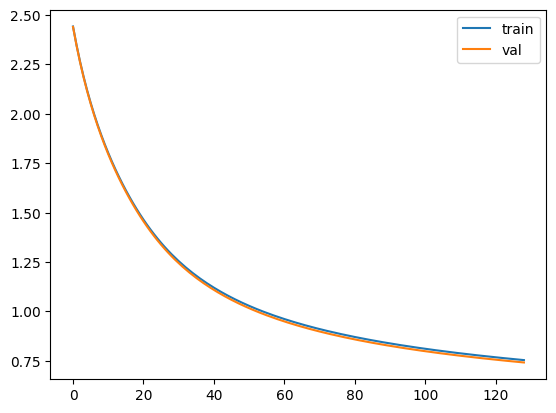

Accuracy: 0.7555


In [ ]:
import os, numpy as np, matplotlib.pyplot as plt

folder = "C:\\Users\\parth\\OneDrive\\Documents\\fashion-minst\\final" 

def load_data(X, y):
    for f in os.listdir(folder):
        for file in os.listdir(f"{folder}/{f}"):
            img = plt.imread(f"{folder}/{f}/{file}")
            X.append(img)

            label = [0] * 10
            label[int(f)] = 1
            y.append(label)

        print(f"Loaded {f} class")

X, y = [], []
load_data(X, y)

X = np.array(X)
y = np.array(y)

X = X[:, :, :, 0]
X = X.reshape(X.shape[0], X.shape[1]*X.shape[2])
print("After reshaping")
print(X.shape, y.shape)
print(X[0], y[0])

class NN:
    def __init__(self, input_neurons, hidden_neurons, output_neurons, learning_rate, epochs):
        self.input_neurons = input_neurons
        self.hidden_neurons = hidden_neurons
        self.output_neurons = output_neurons
        self.epochs = epochs
        self.lr = learning_rate

        self.wih = np.random.randn(hidden_neurons, input_neurons) * np.sqrt(2/input_neurons)
        self.bih = np.zeros((hidden_neurons, 1))

        self.who = np.random.randn(output_neurons, hidden_neurons) * np.sqrt(2/hidden_neurons)
        self.bho = np.zeros((output_neurons, 1))

    def relu(self, z):
        return z * (z > 0)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def relu_derivative(self, z):
        return 1 * (z > 0)

    def sigmoid_derivative(self, z):
        return z * (1 - z)

    def softmax(self, z):
        return np.exp(z) / np.sum(np.exp(z), axis=0)

    def softmax_derivative(self, z):
        return z * (1 - z)

    def mean_squared_error(self, y, y_hat):
        return np.mean((y - y_hat) ** 2, axis=0)

    def cross_entropy_loss(self, y, y_hat):
        epsilon = 1e-12
        y_hat = np.clip(y_hat, epsilon, 1. - epsilon)
        return -np.sum(y * np.log(y_hat), axis=0)

    def mean_squared_error_derivative(self, y, y_hat):
        return y_hat - y

    def cross_entropy_derivative(self, y, y_hat):
        return y_hat - y

    def forward(self, input_list):
        inputs = np.array(input_list, ndmin=2).T
        inputs = inputs - np.mean(inputs)

        hidden_inputs = np.dot(self.wih, inputs) + self.bih
        hidden_outputs = self.relu(hidden_inputs)

        final_inputs = np.dot(self.who, hidden_outputs) + self.bho
        outputs = self.softmax(final_inputs)

        return outputs

    def backprop(self, inputs_list, targets_list):
        inputs = np.array(inputs_list, ndmin=2).T
        inputs = inputs - np.mean(inputs)

        tj = np.array(targets_list, ndmin=2).T

        hidden_inputs = np.dot(self.wih, inputs) + self.bih
        hidden_outputs = self.relu(hidden_inputs)

        final_inputs = np.dot(self.who, hidden_outputs) + self.bho
        yj = self.softmax(final_inputs)

        loss = self.cross_entropy_loss(tj, yj)

        dE_dzo = self.cross_entropy_derivative(tj, yj)

        dE_dwho = np.dot(dE_dzo, hidden_outputs.T) / hidden_outputs.shape[1]
        dE_dbho = np.mean(dE_dzo, axis=1, keepdims=True)

        self.who -= self.lr * dE_dwho
        self.bho -= self.lr * dE_dbho

        dE_dah = np.dot(self.who.T, dE_dzo)
        dE_dzh = dE_dah * self.relu_derivative(hidden_inputs)
        dE_dwih = np.dot(dE_dzh, inputs.T) / inputs.shape[1]
        dE_dbih = np.mean(dE_dzh, axis=1, keepdims=True)

        self.wih -= self.lr * dE_dwih
        self.bih -= self.lr * dE_dbih

        return np.mean(loss)

    def fit(self, inputs_list, targets_list, validation_data, validation_labels):
        train_loss = []
        val_loss = []
        for epoch in range(self.epochs):
            loss = self.backprop(inputs_list, targets_list)
            train_loss.append(loss)
            vloss = self.cross_entropy_loss(validation_labels.T, self.forward(validation_data))
            val_loss.append(np.mean(vloss))
            print(f"Epoch: {epoch}, Loss: {loss}, Val Loss: {val_loss[-1]}")
        return train_loss[1:], val_loss[:-1]

    def predict(self, X):
        outputs = self.forward(X).T
        return outputs

fashion_mnist = NN(784, 160, 10, 0.03, 130)
p = np.random.permutation(len(X))
X, y = X[p], y[p]

X_train, y_train = X[:int(0.7*len(X))], y[:int(0.7*len(X))]
X_val, y_val = X[int(0.7*len(X)):int(0.9*len(X))], y[int(0.7*len(X)):int(0.9*len(X))]
X_test, y_test = X[int(0.9*len(X)):], y[int(0.9*len(X)):]

train_loss, val_loss = fashion_mnist.fit(X_train, y_train, X_val, y_val)

plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend()
plt.show()

y_pred = fashion_mnist.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
print(f"Accuracy: {np.mean(y_pred == y_test)}")
